In [251]:
import numpy as np #Importing the necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [204]:
df=pd.read_csv('/content/brain_stoke.csv')  #Uploading the dataset

In [205]:
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

In [206]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [207]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [208]:
df.shape  #Printing the no of rows and columns.

(4981, 11)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [210]:
df.isnull()  #Checking for the null values.

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


In [211]:
df.isnull().sum()   #Sum of null values is present.

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [212]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [213]:
df['age'].value_counts()  #Counting the age.

78.00    102
57.00     92
54.00     85
51.00     84
79.00     84
        ... 
1.16       3
0.48       3
0.40       2
0.08       2
0.16       1
Name: age, Length: 104, dtype: int64

In [214]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [215]:
X = df.drop(columns='stroke', axis=1)
Y = df['stroke']

In [216]:
print(X)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

In [217]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64


In [218]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [219]:
brain_data = df.copy(deep=True)

In [220]:
brain_data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [221]:
brain_data['gender'].replace(['Male','Female'],[0,1],inplace=True)

In [222]:
brain_data.head(6)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,0,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [223]:
brain_data['ever_married'].replace(['Yes','No'],[0,1],inplace=True)   #replacing the 0 and 1 for the column ever_married

In [224]:
brain_data.head(6)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,0,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,0,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,0,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,0,Private,Urban,186.21,29.0,formerly smoked,1
5,0,74.0,1,1,0,Private,Rural,70.09,27.4,never smoked,1


In [225]:
brain_data['work_type'].replace(['Private','Self-employed','children','Govt_job'],[0,1,2,3],inplace=True)

In [226]:
brain_data['Residence_type'].replace(['Urban','Rural'],[0,1],inplace=True)

In [227]:
brain_data['smoking_status'].replace(['formerly smoked','never smoked','smokes','Unknown'],[0,1,2,3],inplace=True) 

In [228]:
brain_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,0,80.0,0,1,0,0,1,105.92,32.5,1,1
2,1,49.0,0,0,0,0,0,171.23,34.4,2,1
3,1,79.0,1,0,0,1,1,174.12,24.0,1,1
4,0,81.0,0,0,0,0,0,186.21,29.0,0,1


In [229]:
brain_new = brain_data.copy(deep=True) #Copy the dataset brain_data to brain_new

In [230]:
brain_new.to_csv('brains_Stroke_new.csv')

In [231]:
brain_new.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,0,80.0,0,1,0,0,1,105.92,32.5,1,1
2,1,49.0,0,0,0,0,0,171.23,34.4,2,1


In [232]:
brain_new.head(3)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,0,80.0,0,1,0,0,1,105.92,32.5,1,1
2,1,49.0,0,0,0,0,0,171.23,34.4,2,1


In [233]:
X = brain_new.drop(columns='stroke', axis=1)
Y = brain_new['stroke']

In [234]:
print(X)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0             0              1             0          0   
1          0  80.0             0              1             0          0   
2          1  49.0             0              0             0          0   
3          1  79.0             1              0             0          1   
4          0  81.0             0              0             0          0   
...      ...   ...           ...            ...           ...        ...   
4976       0  41.0             0              0             1          0   
4977       0  40.0             0              0             0          0   
4978       1  45.0             1              0             0          3   
4979       0  40.0             0              0             0          0   
4980       1  80.0             1              0             0          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  0   

In [235]:
Y.head(4)

0    1
1    1
2    1
3    1
Name: stroke, dtype: int64

In [236]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)  #Splitting the data into training and testing data.

In [237]:
print(X.shape, X_train.shape, X_test.shape)

(4981, 10) (3486, 10) (1495, 10)


In [238]:
model = LogisticRegression()

In [239]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [240]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [241]:
print('The accuracy for the training data is : ', training_data_accuracy)

The accuracy for the training data is :  0.9497991967871486


In [242]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [243]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9498327759197325


In [245]:
input_data=(0,5,3,2,13,14,36,86,35,22)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a brain stroke Disease')
else:
  print('The Person has brain stroke Disease')

[0]
The Person does not have a brain stroke Disease


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='row_0'>

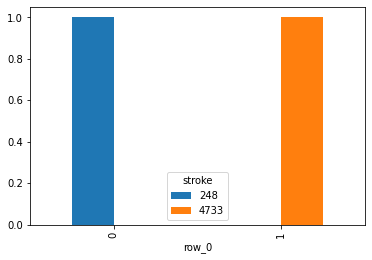

In [252]:
brain_data['stroke'].value_counts()
pd.crosstab(brain_data['stroke'].unique(),brain_data['stroke'].value_counts()).plot(kind="bar")  #Bar chart for Stroke.